In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

folder_path = '/content/drive/MyDrive/animals'
for dirname, _, filenames in os.walk(folder_path): 
    print(dirname) 

/content/drive/MyDrive/animals
/content/drive/MyDrive/animals/panda
/content/drive/MyDrive/animals/cats
/content/drive/MyDrive/animals/dogs


In [ ]:
print('Total cats images:', len(os.listdir(folder_path + '/cats')))
print('Total dogs images:', len(os.listdir(folder_path + '/dogs')))
print('Total pandas images:', len(os.listdir(folder_path + '/panda')))


Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Text(0.5, 1.0, 'Third')

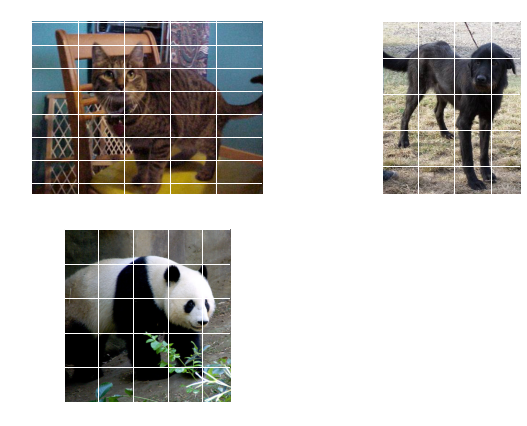

In [ ]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = image.load_img(folder_path + '/cats/cats_00001.jpg')
Image2 = image.load_img(folder_path + '/dogs/dogs_00001.jpg')
Image3 = image.load_img(folder_path + '/panda/panda_00001.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")



In [ ]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.applications.resnet50.ResNet50(input_shape=(108,108,3), include_top=False)])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    verbose=1,
                    )

Epoch 1/25
75/75 [==============================] - 1163s 15s/step - loss: 1.5239 - accuracy: 0.7571 - val_loss: 0.4662 - val_accuracy: 0.8733
Epoch 2/25
75/75 [==============================] - 132s 2s/step - loss: 0.5314 - accuracy: 0.8817 - val_loss: 0.3600 - val_accuracy: 0.8883
Epoch 3/25
75/75 [==============================] - 132s 2s/step - loss: 0.2383 - accuracy: 0.9271 - val_loss: 0.3113 - val_accuracy: 0.9167
Epoch 4/25
75/75 [==============================] - 132s 2s/step - loss: 0.1687 - accuracy: 0.9442 - val_loss: 0.4606 - val_accuracy: 0.8967
Epoch 5/25
75/75 [==============================] - 132s 2s/step - loss: 0.1360 - accuracy: 0.9492 - val_loss: 0.3989 - val_accuracy: 0.9067
Epoch 6/25
75/75 [==============================] - 132s 2s/step - loss: 0.1507 - accuracy: 0.9617 - val_loss: 0.4683 - val_accuracy: 0.8933
Epoch 7/25
75/75 [==============================] - 132s 2s/step - loss: 0.1163 - accuracy: 0.9642 - val_loss: 0.4012 - val_accuracy: 0.9033
Epoch 8/25


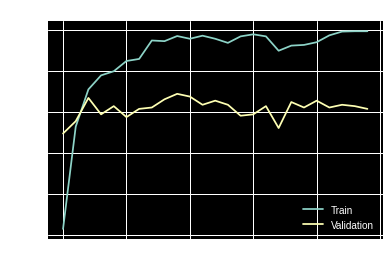

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

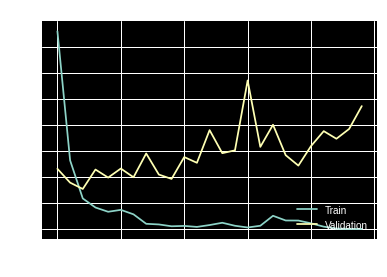

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()